## General image utilities

In [1]:
from nimbro_utils.lazy import show_image, save_image, convert_image, download_image, resize_image, image_info

### show_image()

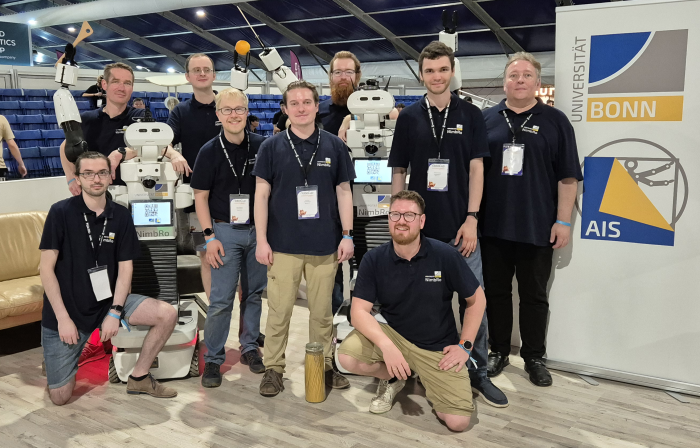

In [2]:
show_image("https://www.ais.uni-bonn.de/nimbro/@Home/images/RC24/RoboCup_2024_Team_NimbRo_Home_07_21.jpg", width=700)

### save_image()

In [3]:
path = save_image("http://nimbro.net/AVATAR/images/NimbRo_Avatar_2022_11_05_Team_and_Robot.jpg")
print(path)

/home/paetzoldb0/ws/jazzy/main/src/nimbro_utils/data/save_image/2025_09_10T15_15_29_09dbdc20.png


### convert_image()

In [4]:
converted = convert_image(path, target_format="Compressed")
print("converted type:", type(converted))

converted type: <class 'sensor_msgs.msg._compressed_image.CompressedImage'>


### download_image()

In [5]:
success, message, image = download_image("http://nimbro.net/AVATAR/images/NimbRo_Avatar_2022_11_05_Team_and_Robot.jpg")
print("success:", success)
print("message:", message)
print("downloaded type:", type(image))

success: True
message: Successfully downloaded image from 'http://nimbro.net/AVATAR/images/NimbRo_Avatar_2022_11_05_Team_and_Robot.jpg' with shape (2539, 3085, 3) of type 'uint8' in range [0, 255] as 'BGR' in '0.329s'.
downloaded type: <class 'numpy.ndarray'>


### resize_image()

In [6]:
image_small = resize_image(image, value=0.5, mode="scale")

### image_info()

In [7]:
print("Converted: ", image_info(converted))
print("Dowloaded: ", image_info(image))
print("Resized:   ", image_info(image_small))

Converted:  Image info: {'type': 'CompressedImage', 'format': 'bgr8; png compressed bgr8', 'len(data)': 10615140}
Dowloaded:  Image info: {'type': 'ndarray', 'shape': (2539, 3085, 3), 'dtype': 'uint8', 'min': 0, 'max': 255}
Resized:    Image info: {'type': 'ndarray', 'shape': (1270, 1542, 3), 'dtype': 'uint8', 'min': 0, 'max': 255}


## Visualization

In [8]:
from nimbro_utils.lazy import visualize_depth, visualize_detections, draw_rectangle, draw_text

### visualize_depth()

See './../node_extensions/sensor_inferface.ipynb'.

### visualize_detections()

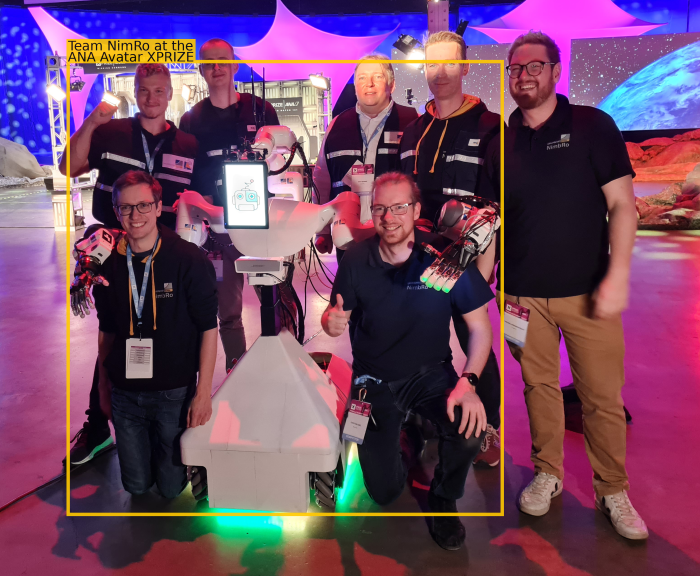

In [9]:
visualization = visualize_detections(
    "http://nimbro.net/AVATAR/images/NimbRo_Avatar_2022_11_05_Team_and_Robot.jpg",
    boxes=[[0.1, 0.11, 0.715, 0.89]],
    labels=["Team NimRo at the\nANA Avatar XPRIZE"],
    label_font_size=58,
    box_thickness=15,
    colors=[(0, 200, 255)]
)
show_image(visualization, width=700)

### draw_rectangle()

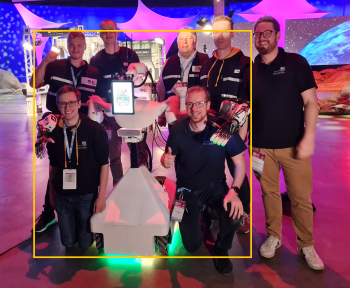

In [10]:
visualization = draw_rectangle(
    "http://nimbro.net/AVATAR/images/NimbRo_Avatar_2022_11_05_Team_and_Robot.jpg",
    box=[0.1, 0.11, 0.715, 0.89],
    thickness=15,
    color=(0, 200, 255)
)
show_image(visualization, width=350)

### draw_text()

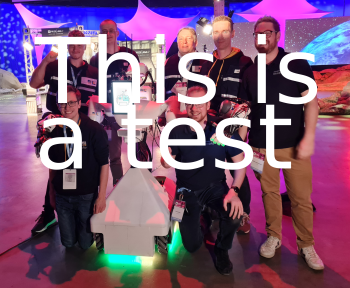

In [11]:
visualization = draw_text(
    "http://nimbro.net/AVATAR/images/NimbRo_Avatar_2022_11_05_Team_and_Robot.jpg",
    text="This is\na test",
    anchor=(300, 1500),
    font_size=800
)
show_image(visualization, width=350)

## Masks

In [12]:
import numpy as np
from nimbro_utils.lazy import encode_mask, decode_mask, erode_or_dilate_mask

In [13]:
mask_np = np.array([[False, True], [False, False]])
print("NumPy:", mask_np)

mask_enc = encode_mask(mask_np)
print("\nEncoded:",mask_enc)

mask_dec = decode_mask(mask_enc)
print("\nDecoded:",mask_dec)

print("\nEquality before encoding and after decoding:", np.all(mask_np == mask_dec))

NumPy: [[False  True]
 [False False]]

Encoded: iVBORw0KGgoAAAANSUhEUgAAAAIAAAACCAAAAABX3VL4AAAADklEQVQIHWNk+M/IwAAABAsBAoUCazcAAAAASUVORK5CYII=

Decoded: [[False  True]
 [False False]]

Equality before encoding and after decoding: True


In [14]:
erode_or_dilate_mask(
    mask=np.array([
        [0, 0,   0,   0,   0, 0, 0],
        [0, 0,   0,   0,   0, 0, 0],
        [0, 0, 255, 255, 255, 0, 0],
        [0, 0, 255, 255, 255, 0, 0],
        [0, 0, 255, 255, 255, 0, 0],
        [0, 0,   0,   0,   0, 0, 0],
        [0, 0,   0,   0,   0, 0, 0]]),
    dilate=False,
    kernel_size=3,
    iterations=1)

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 255,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [15]:
erode_or_dilate_mask(
    mask=np.array([
        [0, 0,   0,   0,   0, 0, 0],
        [0, 0,   0,   0,   0, 0, 0],
        [0, 0, 255, 255, 255, 0, 0],
        [0, 0, 255, 255, 255, 0, 0],
        [0, 0, 255, 255, 255, 0, 0],
        [0, 0,   0,   0,   0, 0, 0],
        [0, 0,   0,   0,   0, 0, 0]]),
    dilate=True,
    kernel_size=3,
    iterations=1)

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0]])